# EvalML

<img src="https://camo.githubusercontent.com/363bfff1b58483f75432d417618f32ed55f47fce31f5c194bb7db2feb48241b7/68747470733a2f2f616c74657279782d6f73732d7765622d696d616765732e73332e616d617a6f6e6177732e636f6d2f6576616c6d6c5f686f72697a6f6e74616c2e737667"/>


+ **`EvalML` est une bibliothèque AutoML qui crée, optimise et évalue des pipelines d'apprentissage automatique à l'aide de fonctions objectives spécifiques au domaine.**

+ **Fonctionnalité clé**

  + `Automatisation` – Facilite l’apprentissage automatique. Évitez de former et de régler les modèles à la main. Comprend des contrôles de qualité des données, une validation croisée et bien plus encore.
  + `Vérifications des données` : détecte et avertit des problèmes liés à vos données et à la configuration des problèmes avant la modélisation.
  + `De bout en bout` : construit et optimise des pipelines qui incluent un prétraitement de pointe, une ingénierie de fonctionnalités, une sélection de fonctionnalités et une variété de techniques de modélisation.
  + `Compréhension du modèle` : fournit des outils pour comprendre et introspecter les modèles, afin de savoir comment ils se comporteront dans votre domaine problématique.
  + `Spécifique au domaine` - Comprend un référentiel de fonctions objectives spécifiques au domaine et une interface pour définir la vôtre.

In [ ]:
!pip install evalml[updater]

In [1]:
import evalml
from evalml import AutoMLSearch
from evalml.utils import infer_feature_types

In [2]:
X, y = evalml.demos.load_fraud(n_rows=250)

             Number of Features
Boolean                       1
Categorical                   6
Numeric                       5

Number of training examples: 250
Targets
False    88.40%
True     11.60%
Name: fraud, dtype: object


In [3]:
X.columns.tolist()

['card_id',
 'store_id',
 'datetime',
 'amount',
 'currency',
 'customer_present',
 'expiration_date',
 'provider',
 'lat',
 'lng',
 'region',
 'country']

In [5]:
X.head()

,card_id,store_id,datetime,amount,currency,customer_present,expiration_date,provider,lat,lng,region,country
id,,,,,,,,,,,,
0,32261,8516,2019-01-01 00:12:26,24900,CUC,True,08/24,Mastercard,38.58894,-89.99038,Fairview Heights,US
1,16434,8516,2019-01-01 09:42:03,15789,MYR,False,11/21,Discover,38.58894,-89.99038,Fairview Heights,US
2,23468,8516,2019-04-17 08:17:01,1883,AUD,False,09/27,Discover,38.58894,-89.99038,Fairview Heights,US
3,14364,8516,2019-01-30 11:54:30,82120,KRW,True,09/20,JCB 16 digit,38.58894,-89.99038,Fairview Heights,US
4,29407,8516,2019-05-01 17:59:36,25745,MUR,True,09/22,American Express,38.58894,-89.99038,Fairview Heights,US


In [6]:
X.ww["expiration_date"] = X["expiration_date"].apply(
    lambda x: "20{}-01-{}".format(x.split("/")[1], x.split("/")[0])
)
X = infer_feature_types(
    X,
    feature_types={
        "store_id": "categorical",
        "expiration_date": "datetime",
        "lat": "categorical",
        "lng": "categorical",
        "provider": "categorical",
    },
)
X.ww

,Physical Type,Logical Type,Semantic Tag(s)
Column,,,
card_id,int64,Integer,['numeric']
store_id,int64,Integer,['numeric']
datetime,datetime64[ns],Datetime,[]
amount,int64,Integer,['numeric']
currency,string,Unknown,[]
customer_present,bool,Boolean,[]
expiration_date,datetime64[ns],Datetime,[]
provider,category,Categorical,['category']
lat,float64,Double,['numeric']


In [7]:
X_train, X_holdout, y_train, y_holdout = evalml.preprocessing.split_data(
    X, y, problem_type="binary", test_size=0.2
)

In [8]:
automl = AutoMLSearch(
    X_train=X_train,
    y_train=y_train,
    problem_type="binary",
    objective="f1",
    max_batches=2,
    verbose=True,
)

AutoMLSearch will use mean CV score to rank pipelines.


INFO:evalml.automl.automl_search.verbose:AutoMLSearch will use mean CV score to rank pipelines.


Removing columns ['currency'] because they are of 'Unknown' type


INFO:evalml.automl.automl_algorithm.default_algorithm.verbose:Removing columns ['currency'] because they are of 'Unknown' type


In [9]:
automl.search(interactive_plot=False)


*****************************


INFO:evalml.automl.automl_search.verbose:
*****************************


* Beginning pipeline search *


INFO:evalml.automl.automl_search.verbose:* Beginning pipeline search *


*****************************


INFO:evalml.automl.automl_search.verbose:*****************************


INFO:evalml.automl.automl_search.verbose:


Optimizing for F1. 


INFO:evalml.automl.automl_search.verbose:Optimizing for F1. 


Greater score is better.



INFO:evalml.automl.automl_search.verbose:Greater score is better.



Using SequentialEngine to train and score pipelines.


INFO:evalml.automl.automl_search.verbose:Using SequentialEngine to train and score pipelines.


Searching up to 2 batches for a total of None pipelines. 


INFO:evalml.automl.automl_search.verbose:Searching up to 2 batches for a total of None pipelines. 


Allowed model families: 



INFO:evalml.automl.automl_search.verbose:Allowed model families: 



Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline


INFO:evalml.automl.automl_search.verbose:Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline


Mode Baseline Binary Classification Pipeline:


INFO:evalml.automl.automl_search.verbose:Mode Baseline Binary Classification Pipeline:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.135)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 score: 0.000
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.135)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 score: 0.000
DEBUG:evalml.automl.automl_search.

	Finished cross validation - mean F1: 0.000


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1: 0.000



*****************************


INFO:evalml.automl.automl_search.verbose:
*****************************


* Evaluating Batch Number 1 *


INFO:evalml.automl.automl_search.verbose:* Evaluating Batch Number 1 *


*****************************


INFO:evalml.automl.automl_search.verbose:*****************************


INFO:evalml.automl.automl_search.verbose:


Random Forest Classifier w/ Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + One Hot Encoder + Oversampler + RF Classifier Select From Model:


INFO:evalml.automl.automl_search.verbose:Random Forest Classifier w/ Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + One Hot Encoder + Oversampler + RF Classifier Select From Model:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.372)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 score: 0.769
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.537)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 score: 0.364
DEBUG:evalml.automl.automl_search.

	Finished cross validation - mean F1: 0.663


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1: 0.663



*****************************


INFO:evalml.automl.automl_search.verbose:
*****************************


* Evaluating Batch Number 2 *


INFO:evalml.automl.automl_search.verbose:* Evaluating Batch Number 2 *


*****************************


INFO:evalml.automl.automl_search.verbose:*****************************


INFO:evalml.automl.automl_search.verbose:


LightGBM Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Oversampler:


INFO:evalml.automl.automl_search.verbose:LightGBM Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Oversampler:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.526)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 score: 0.667
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.677)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 score: 0.500
DEBUG:evalml.automl.automl_search.

	Finished cross validation - mean F1: 0.589


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1: 0.589


Extra Trees Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Oversampler:


INFO:evalml.automl.automl_search.verbose:Extra Trees Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Oversampler:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.290)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 score: 0.462
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.359)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 score: 0.333
DEBUG:evalml.automl.automl_search.

	Finished cross validation - mean F1: 0.376


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1: 0.376


Elastic Net Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + Standard Scaler + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Standard Scaler + Oversampler:


INFO:evalml.automl.automl_search.verbose:Elastic Net Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + Standard Scaler + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Standard Scaler + Oversampler:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.037)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 score: 0.211
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.251)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 score: 0.316
DEBUG:evalml.automl.automl_search.

	Finished cross validation - mean F1: 0.242


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1: 0.242


XGBoost Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Oversampler:


INFO:evalml.automl.automl_search.verbose:XGBoost Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Oversampler:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.821)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 score: 0.545
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.855)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 score: 0.500
DEBUG:evalml.automl.automl_search.

	Finished cross validation - mean F1: 0.432


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1: 0.432


Logistic Regression Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + Standard Scaler + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Standard Scaler + Oversampler:


INFO:evalml.automl.automl_search.verbose:Logistic Regression Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + Standard Scaler + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Standard Scaler + Oversampler:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.036)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 score: 0.214
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.251)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 score: 0.316
DEBUG:evalml.automl.automl_search.

	Finished cross validation - mean F1: 0.247


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1: 0.247



Search finished after 42.55 seconds    


INFO:evalml.automl.automl_search.verbose:
Search finished after 42.55 seconds    


Best pipeline: Random Forest Classifier w/ Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + One Hot Encoder + Oversampler + RF Classifier Select From Model


INFO:evalml.automl.automl_search.verbose:Best pipeline: Random Forest Classifier w/ Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + One Hot Encoder + Oversampler + RF Classifier Select From Model


Best pipeline F1: 0.663337


INFO:evalml.automl.automl_search.verbose:Best pipeline F1: 0.663337


{1: {'Random Forest Classifier w/ Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + One Hot Encoder + Oversampler + RF Classifier Select From Model': 8.742733478546143,
  'Total time of batch': 8.979443073272705},
 2: {'LightGBM Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Oversampler': 4.784894704818726,
  'Extra Trees Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Oversampler': 4.980075120925903,
  'Elastic Net Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + Standard Scaler + Se

In [11]:
automl = AutoMLSearch(
    X_train=X_train,
    y_train=y_train,
    problem_type="binary",
    objective="f1",
    max_batches=2,
    verbose=False,
)
automl.search()

{1: {'Random Forest Classifier w/ Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + One Hot Encoder + Oversampler + RF Classifier Select From Model': 6.225863695144653,
  'Total time of batch': 6.363144397735596},
 2: {'LightGBM Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Oversampler': 3.8022725582122803,
  'Extra Trees Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Oversampler': 7.3783698081970215,
  'Elastic Net Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + Standard Scaler + 

In [12]:
automl.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Random Forest Classifier w/ Label Encoder + Dr...,1,0.663337,0.663337,0.263244,66.333666,False,"{'Label Encoder': {'positive_label': None}, 'D..."
1,2,LightGBM Classifier w/ Label Encoder + Select ...,2,0.588889,0.588889,0.083887,58.888889,False,"{'Label Encoder': {'positive_label': None}, 'N..."
2,5,XGBoost Classifier w/ Label Encoder + Select C...,5,0.431818,0.431818,0.159091,43.181818,False,"{'Label Encoder': {'positive_label': None}, 'N..."
3,3,Extra Trees Classifier w/ Label Encoder + Sele...,3,0.376068,0.376068,0.074019,37.606838,False,"{'Label Encoder': {'positive_label': None}, 'N..."
4,6,Logistic Regression Classifier w/ Label Encode...,6,0.246867,0.246867,0.059718,24.686717,False,"{'Label Encoder': {'positive_label': None}, 'N..."
5,4,Elastic Net Classifier w/ Label Encoder + Sele...,4,0.242105,0.242105,0.064029,24.210526,False,"{'Label Encoder': {'positive_label': None}, 'N..."
6,0,Mode Baseline Binary Classification Pipeline,0,0.000000,0.000000,0.000000,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [13]:
automl.describe_pipeline(3)


*******************************************************************************************************************************************************************************************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
*******************************************************************************************************************************************************************************************************************************************************************************


* Extra Trees Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Oversampler *


INFO:evalml.pipelines.pipeline_base.describe:* Extra Trees Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Oversampler *


*******************************************************************************************************************************************************************************************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:*******************************************************************************************************************************************************************************************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: Extra Trees


INFO:evalml.pipelines.pipeline_base.describe:Model Family: Extra Trees


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Select Columns By Type Transformer


INFO:evalml.pipelines.component_graph.describe:2. Select Columns By Type Transformer


	 * column_types : ['category', 'EmailAddress', 'URL']


INFO:evalml.pipelines.components.component_base.describe:	 * column_types : ['category', 'EmailAddress', 'URL']


	 * exclude : True


INFO:evalml.pipelines.components.component_base.describe:	 * exclude : True


3. Label Encoder


INFO:evalml.pipelines.component_graph.describe:3. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


4. Drop Columns Transformer


INFO:evalml.pipelines.component_graph.describe:4. Drop Columns Transformer


	 * columns : ['currency']


INFO:evalml.pipelines.components.component_base.describe:	 * columns : ['currency']


5. DateTime Featurizer


INFO:evalml.pipelines.component_graph.describe:5. DateTime Featurizer


	 * features_to_extract : ['year', 'month', 'day_of_week', 'hour']


INFO:evalml.pipelines.components.component_base.describe:	 * features_to_extract : ['year', 'month', 'day_of_week', 'hour']


	 * encode_as_categories : False


INFO:evalml.pipelines.components.component_base.describe:	 * encode_as_categories : False


	 * time_index : None


INFO:evalml.pipelines.components.component_base.describe:	 * time_index : None


6. Imputer


INFO:evalml.pipelines.component_graph.describe:6. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


7. Select Columns Transformer


INFO:evalml.pipelines.component_graph.describe:7. Select Columns Transformer


	 * columns : ['card_id', 'store_id', 'amount', 'customer_present', 'lat', 'lng', 'datetime_month', 'datetime_day_of_week', 'datetime_hour', 'expiration_date_year', 'expiration_date_day_of_week']


INFO:evalml.pipelines.components.component_base.describe:	 * columns : ['card_id', 'store_id', 'amount', 'customer_present', 'lat', 'lng', 'datetime_month', 'datetime_day_of_week', 'datetime_hour', 'expiration_date_year', 'expiration_date_day_of_week']


8. Select Columns Transformer


INFO:evalml.pipelines.component_graph.describe:8. Select Columns Transformer


	 * columns : ['provider', 'region', 'country']


INFO:evalml.pipelines.components.component_base.describe:	 * columns : ['provider', 'region', 'country']


9. Label Encoder


INFO:evalml.pipelines.component_graph.describe:9. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


10. Imputer


INFO:evalml.pipelines.component_graph.describe:10. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


11. One Hot Encoder


INFO:evalml.pipelines.component_graph.describe:11. One Hot Encoder


	 * top_n : 10


INFO:evalml.pipelines.components.component_base.describe:	 * top_n : 10


	 * features_to_encode : None


INFO:evalml.pipelines.components.component_base.describe:	 * features_to_encode : None


	 * categories : None


INFO:evalml.pipelines.components.component_base.describe:	 * categories : None


	 * drop : if_binary


INFO:evalml.pipelines.components.component_base.describe:	 * drop : if_binary


	 * handle_unknown : ignore


INFO:evalml.pipelines.components.component_base.describe:	 * handle_unknown : ignore


	 * handle_missing : error


INFO:evalml.pipelines.components.component_base.describe:	 * handle_missing : error


12. Oversampler


INFO:evalml.pipelines.component_graph.describe:12. Oversampler


	 * sampling_ratio : 0.25


INFO:evalml.pipelines.components.component_base.describe:	 * sampling_ratio : 0.25


	 * k_neighbors_default : 5


INFO:evalml.pipelines.components.component_base.describe:	 * k_neighbors_default : 5


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


	 * sampling_ratio_dict : None


INFO:evalml.pipelines.components.component_base.describe:	 * sampling_ratio_dict : None


	 * categorical_features : [3, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_features : [3, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


	 * k_neighbors : 5


INFO:evalml.pipelines.components.component_base.describe:	 * k_neighbors : 5


13. Extra Trees Classifier


INFO:evalml.pipelines.component_graph.describe:13. Extra Trees Classifier


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_features : sqrt


INFO:evalml.pipelines.components.component_base.describe:	 * max_features : sqrt


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * min_samples_split : 2


INFO:evalml.pipelines.components.component_base.describe:	 * min_samples_split : 2


	 * min_weight_fraction_leaf : 0.0


INFO:evalml.pipelines.components.component_base.describe:	 * min_weight_fraction_leaf : 0.0


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Objective to optimize binary classification pipeline thresholds for: <evalml.objectives.standard_metrics.F1 object at 0x7a68228508e0>


INFO:evalml.automl.automl_search.describe_pipeline:Objective to optimize binary classification pipeline thresholds for: <evalml.objectives.standard_metrics.F1 object at 0x7a68228508e0>


Total training time (including CV): 7.4 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 7.4 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


               F1  MCC Binary  Log Loss Binary  Gini   AUC  Precision  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0           0.462       0.421            0.342 0.394 0.697      0.600                     0.671            0.896        133           67
1           0.333       0.296            0.341 0.352 0.676      0.500                     0.608            0.881        133           67
2           0.333       0.273            0.355 0.361 0.680      0.400                     0.617            0.879        134           66
mean        0.376       0.330            0.346 0.369 0.684      0.500                     0.632            0.885          -            -
std         0.074       0.080            0.008 0.022 0.011      0.100                     0.034            0.009          -            -
coef of var 0.197       0.241            0.023 0.060 0.016      0.200                     0.053            0.010          -            -


INFO:evalml.automl.automl_search.describe_pipeline:               F1  MCC Binary  Log Loss Binary  Gini   AUC  Precision  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0           0.462       0.421            0.342 0.394 0.697      0.600                     0.671            0.896        133           67
1           0.333       0.296            0.341 0.352 0.676      0.500                     0.608            0.881        133           67
2           0.333       0.273            0.355 0.361 0.680      0.400                     0.617            0.879        134           66
mean        0.376       0.330            0.346 0.369 0.684      0.500                     0.632            0.885          -            -
std         0.074       0.080            0.008 0.022 0.011      0.100                     0.034            0.009          -            -
coef of var 0.197       0.241            0.023 0.060 0.016      0.200                     0.053            0.010          -    

In [14]:
pipeline = automl.get_pipeline(3)
print(pipeline.parameters)

{'Label Encoder': {'positive_label': None}, 'Numeric Pipeline - Select Columns By Type Transformer': {'column_types': ['category', 'EmailAddress', 'URL'], 'exclude': True}, 'Numeric Pipeline - Label Encoder': {'positive_label': None}, 'Numeric Pipeline - Drop Columns Transformer': {'columns': ['currency']}, 'Numeric Pipeline - DateTime Featurizer': {'features_to_extract': ['year', 'month', 'day_of_week', 'hour'], 'encode_as_categories': False, 'time_index': None}, 'Numeric Pipeline - Imputer': {'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'boolean_impute_strategy': 'most_frequent', 'categorical_fill_value': None, 'numeric_fill_value': None, 'boolean_fill_value': None}, 'Numeric Pipeline - Select Columns Transformer': {'columns': ['card_id', 'store_id', 'amount', 'customer_present', 'lat', 'lng', 'datetime_month', 'datetime_day_of_week', 'datetime_hour', 'expiration_date_year', 'expiration_date_day_of_week']}, 'Categorical Pipeline - Select Columns 

In [15]:
pipeline = automl.best_pipeline
pipeline.score(X_holdout, y_holdout, ["f1"])

OrderedDict([('F1', 0.6666666666666666)])

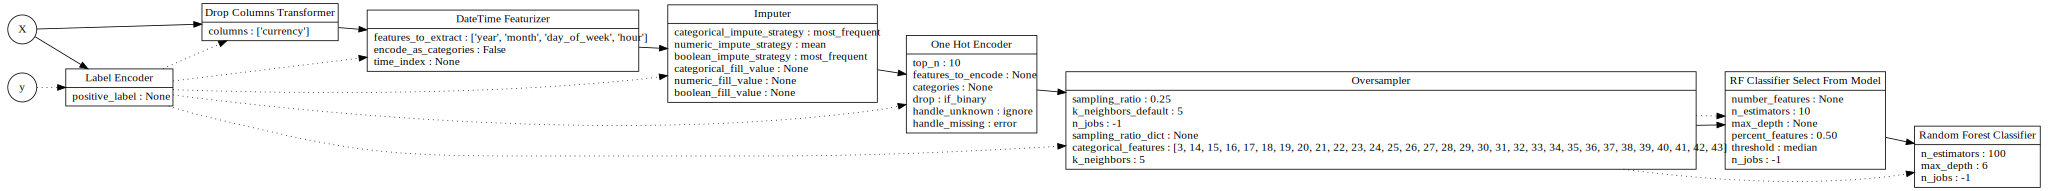

In [16]:
pipeline.graph()